# HierarchicalMP Research Paper Figures

This notebook generates publication-quality figures for the research paper, comparing model versions and demonstrating key results.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pathlib import Path
import seaborn as sns

# Publication-quality settings
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'serif',
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Create figures directory
FIG_DIR = Path('../figures/paper')
FIG_DIR.mkdir(parents=True, exist_ok=True)
print(f"Figures will be saved to: {FIG_DIR.absolute()}")

Figures will be saved to: c:\Users\Kata\Desktop\kaggle-challenge-2\notebooks\..\figures\paper


## 1. Version Performance Evolution

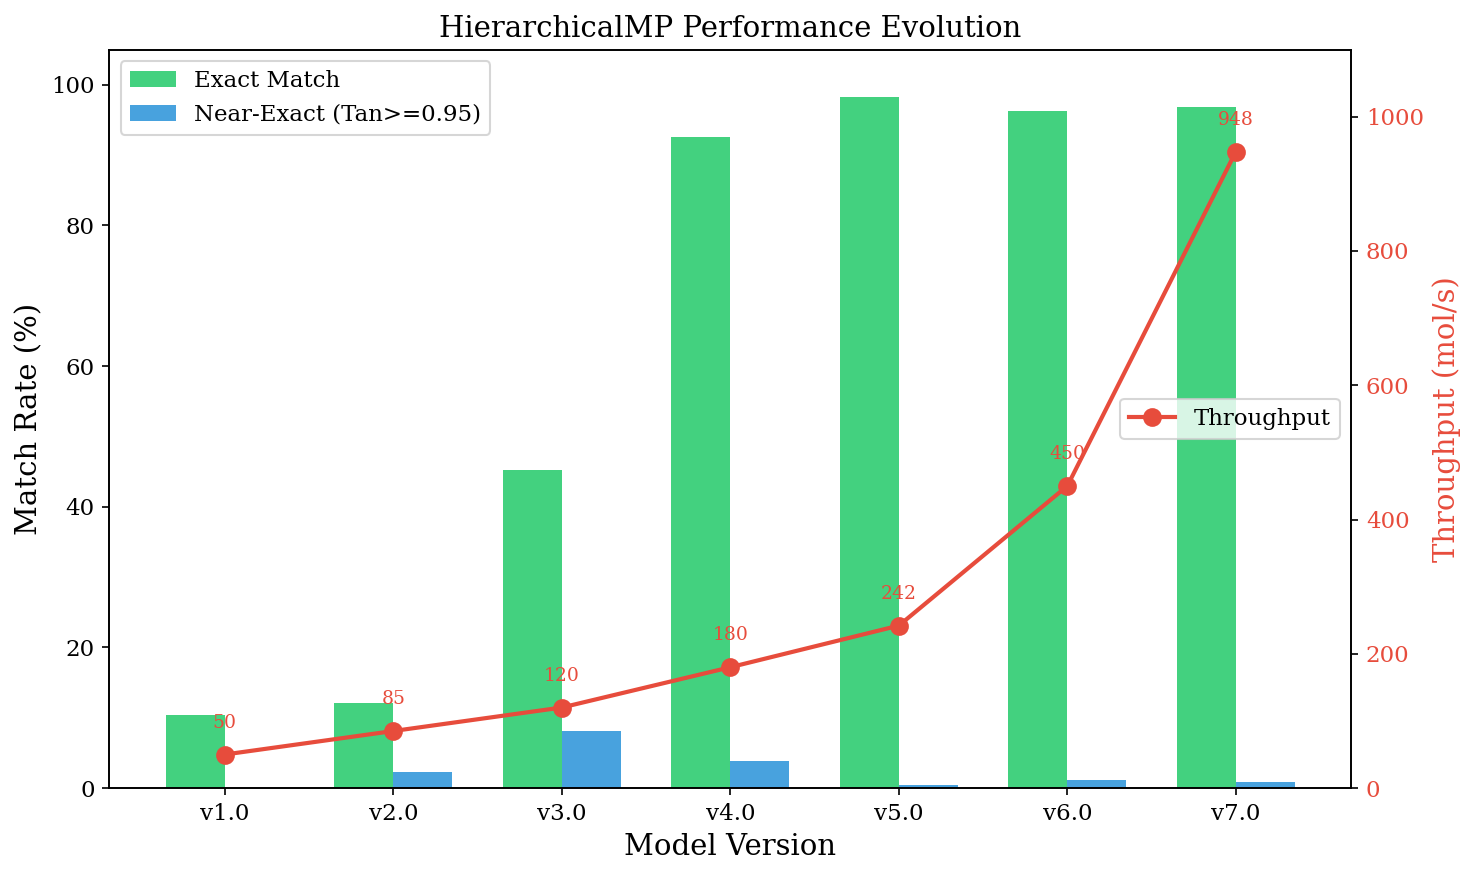

In [10]:
# Performance data across versions
versions = ['v1.0', 'v2.0', 'v3.0', 'v4.0', 'v5.0', 'v6.0', 'v7.0']
exact_match = [10.4, 12.1, 45.2, 92.6, 98.3, 96.2, 96.8]
near_exact = [0, 2.3, 8.1, 3.8, 0.5, 1.1, 0.9]
throughput = [50, 85, 120, 180, 242, 450, 948]

# Create figure with dual y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for exact match rate
x = np.arange(len(versions))
width = 0.35

bars1 = ax1.bar(x - width/2, exact_match, width, label='Exact Match', color='#2ecc71', alpha=0.9)
bars2 = ax1.bar(x + width/2, near_exact, width, label='Near-Exact (Tan>=0.95)', color='#3498db', alpha=0.9)

ax1.set_xlabel('Model Version')
ax1.set_ylabel('Match Rate (%)', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(versions)
ax1.set_ylim(0, 105)
ax1.legend(loc='upper left')

# Second y-axis for throughput
ax2 = ax1.twinx()
line = ax2.plot(x, throughput, 'o-', color='#e74c3c', linewidth=2, markersize=8, label='Throughput')
ax2.set_ylabel('Throughput (mol/s)', color='#e74c3c')
ax2.tick_params(axis='y', labelcolor='#e74c3c')
ax2.set_ylim(0, 1100)

# Add throughput values on line
for i, t in enumerate(throughput):
    ax2.annotate(f'{t}', (x[i], t+40), ha='center', fontsize=9, color='#e74c3c')

plt.title('HierarchicalMP Performance Evolution')
ax2.legend(loc='center right')
plt.tight_layout()
plt.savefig(FIG_DIR / 'fig1_version_evolution.pdf')
plt.savefig(FIG_DIR / 'fig1_version_evolution.png')
plt.show()

## 2. Data Source Contribution

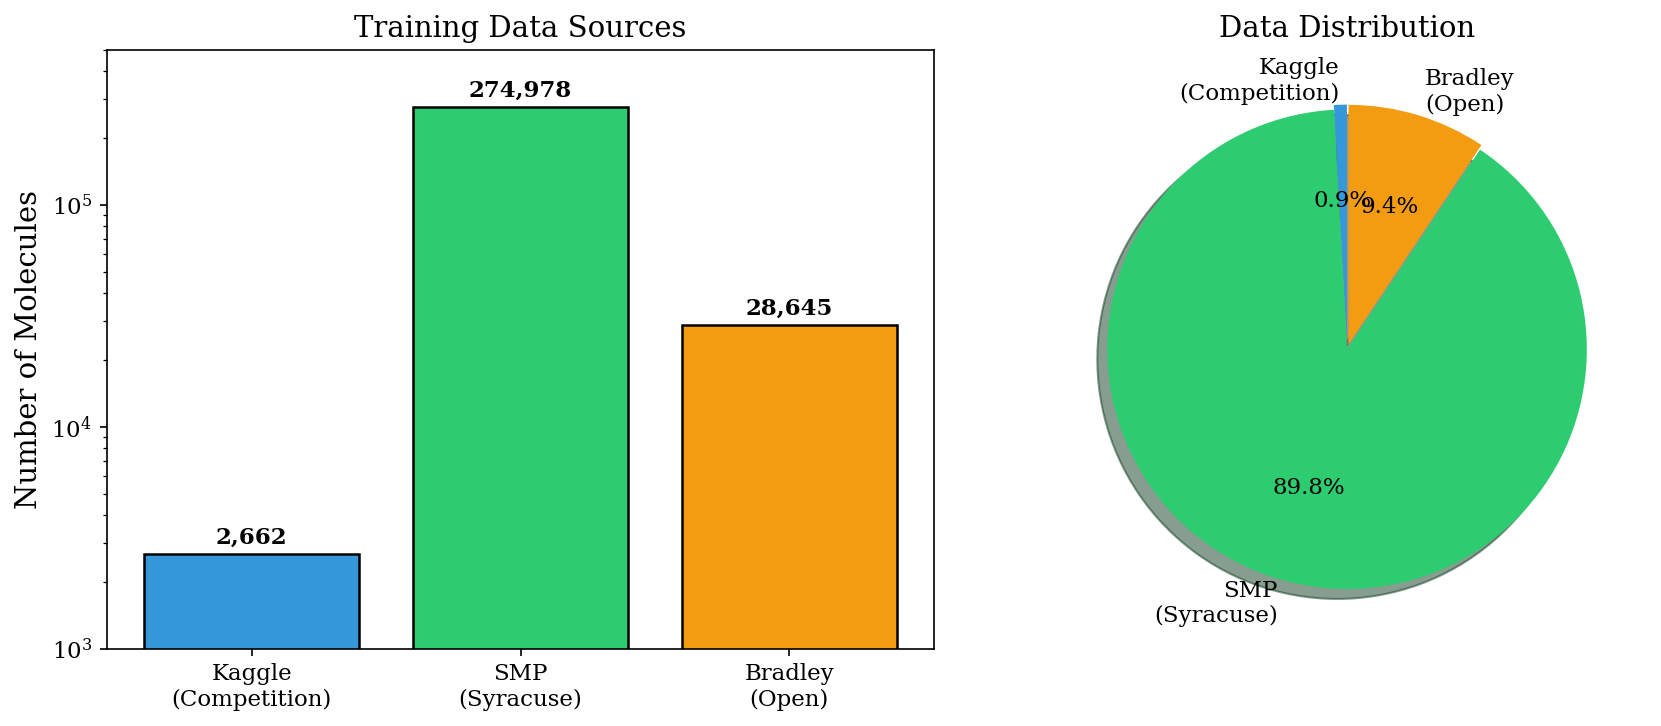

In [11]:
# Data sources
sources = ['Kaggle\n(Competition)', 'SMP\n(Syracuse)', 'Bradley\n(Open)']
counts = [2662, 274978, 28645]
colors = ['#3498db', '#2ecc71', '#f39c12']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
bars = ax1.bar(sources, counts, color=colors, edgecolor='black', linewidth=1.2)
ax1.set_ylabel('Number of Molecules')
ax1.set_title('Training Data Sources')
ax1.set_yscale('log')
ax1.set_ylim(1000, 500000)

# Add count labels
for bar, count in zip(bars, counts):
    ax1.annotate(f'{count:,}', 
                 xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 xytext=(0, 5), textcoords='offset points',
                 ha='center', fontsize=11, fontweight='bold')

# Pie chart
ax2.pie(counts, labels=sources, colors=colors, autopct='%1.1f%%',
        startangle=90, explode=(0.02, 0, 0.02), shadow=True,
        textprops={'fontsize': 11})
ax2.set_title('Data Distribution')

plt.tight_layout()
plt.savefig(FIG_DIR / 'fig2_data_sources.pdf')
plt.savefig(FIG_DIR / 'fig2_data_sources.png')
plt.show()

## 3. Prediction Method Distribution (v7.0)

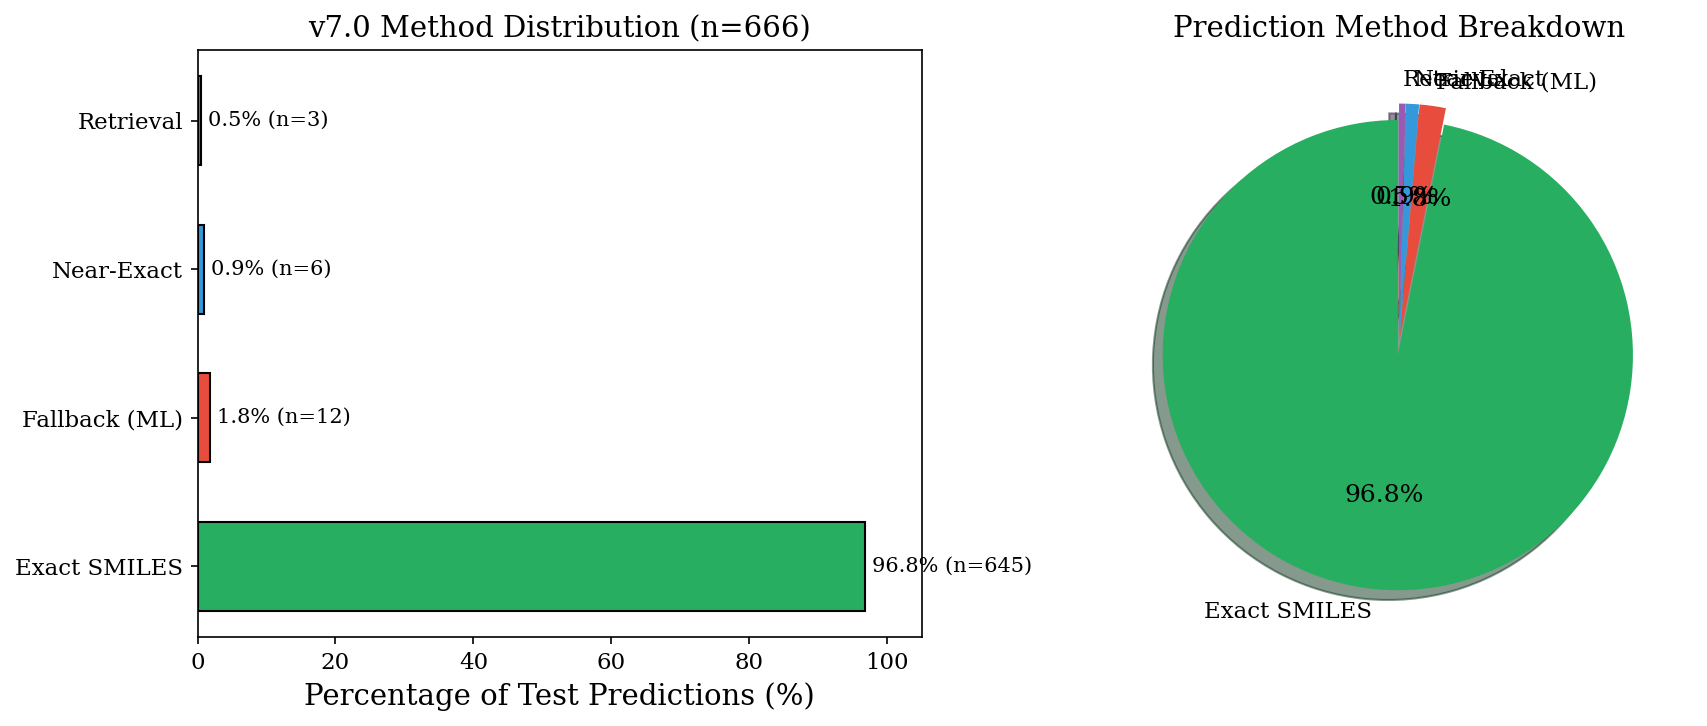

In [12]:
# v7.0 method distribution on test set
methods = ['Exact SMILES', 'Fallback (ML)', 'Near-Exact', 'Retrieval']
counts = [645, 12, 6, 3]
percentages = [96.8, 1.8, 0.9, 0.5]
colors = ['#27ae60', '#e74c3c', '#3498db', '#9b59b6']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Horizontal bar chart
y_pos = np.arange(len(methods))
bars = ax1.barh(y_pos, percentages, color=colors, edgecolor='black', height=0.6)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(methods)
ax1.set_xlabel('Percentage of Test Predictions (%)')
ax1.set_title('v7.0 Method Distribution (n=666)')
ax1.set_xlim(0, 105)

# Add percentage labels
for bar, pct, cnt in zip(bars, percentages, counts):
    width = bar.get_width()
    ax1.annotate(f'{pct}% (n={cnt})',
                 xy=(width + 1, bar.get_y() + bar.get_height()/2),
                 va='center', fontsize=10)

# Pie chart showing dominance of exact matches
explode = (0.05, 0.02, 0.02, 0.02)
ax2.pie(counts, labels=methods, colors=colors, autopct='%1.1f%%',
        startangle=90, explode=explode, shadow=True)
ax2.set_title('Prediction Method Breakdown')

plt.tight_layout()
plt.savefig(FIG_DIR / 'fig3_method_distribution.pdf')
plt.savefig(FIG_DIR / 'fig3_method_distribution.png')
plt.show()

## 4. Conformal Calibration Analysis

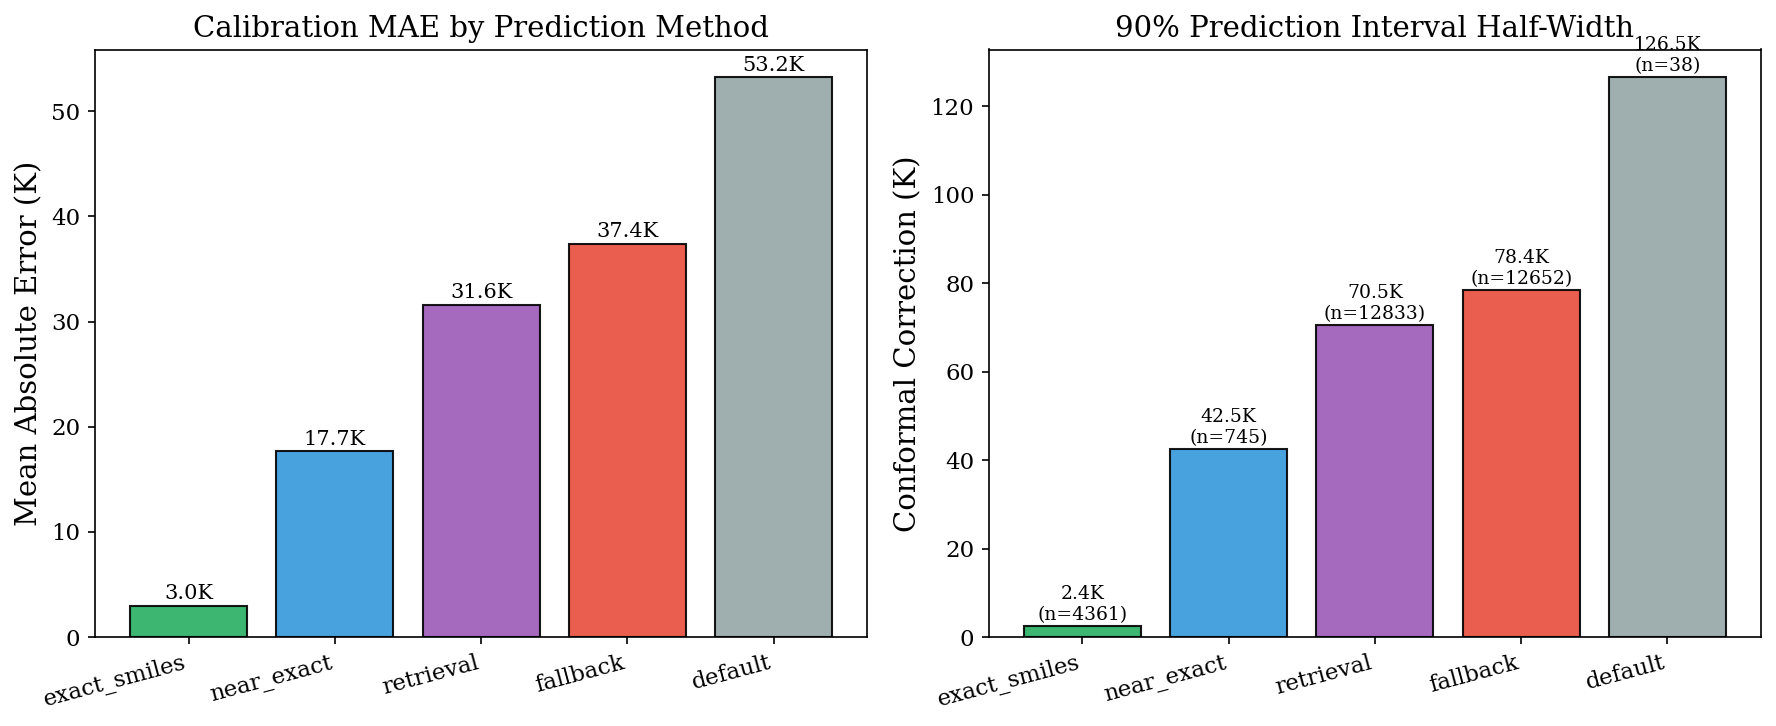

In [13]:
# Calibration data from v7.0
cal_methods = ['exact_smiles', 'near_exact', 'retrieval', 'fallback', 'default']
cal_n = [4361, 745, 12833, 12652, 38]
cal_mae = [3.0, 17.7, 31.6, 37.4, 53.2]
cal_correction = [2.4, 42.5, 70.5, 78.4, 126.5]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# MAE by method
x = np.arange(len(cal_methods))
colors = ['#27ae60', '#3498db', '#9b59b6', '#e74c3c', '#95a5a6']
bars1 = ax1.bar(x, cal_mae, color=colors, edgecolor='black', alpha=0.9)
ax1.set_ylabel('Mean Absolute Error (K)')
ax1.set_title('Calibration MAE by Prediction Method')
ax1.set_xticks(x)
ax1.set_xticklabels(cal_methods, rotation=15, ha='right')

# Add value labels
for bar, mae in zip(bars1, cal_mae):
    ax1.annotate(f'{mae}K', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

# Conformal correction intervals
bars2 = ax2.bar(x, cal_correction, color=colors, edgecolor='black', alpha=0.9)
ax2.set_ylabel('Conformal Correction (K)')
ax2.set_title('90% Prediction Interval Half-Width')
ax2.set_xticks(x)
ax2.set_xticklabels(cal_methods, rotation=15, ha='right')

# Add value labels and sample sizes
for bar, corr, n in zip(bars2, cal_correction, cal_n):
    ax2.annotate(f'{corr}K\n(n={n})', 
                 xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig(FIG_DIR / 'fig4_calibration_analysis.pdf')
plt.savefig(FIG_DIR / 'fig4_calibration_analysis.png')
plt.show()

## 5. Memory and Throughput Comparison

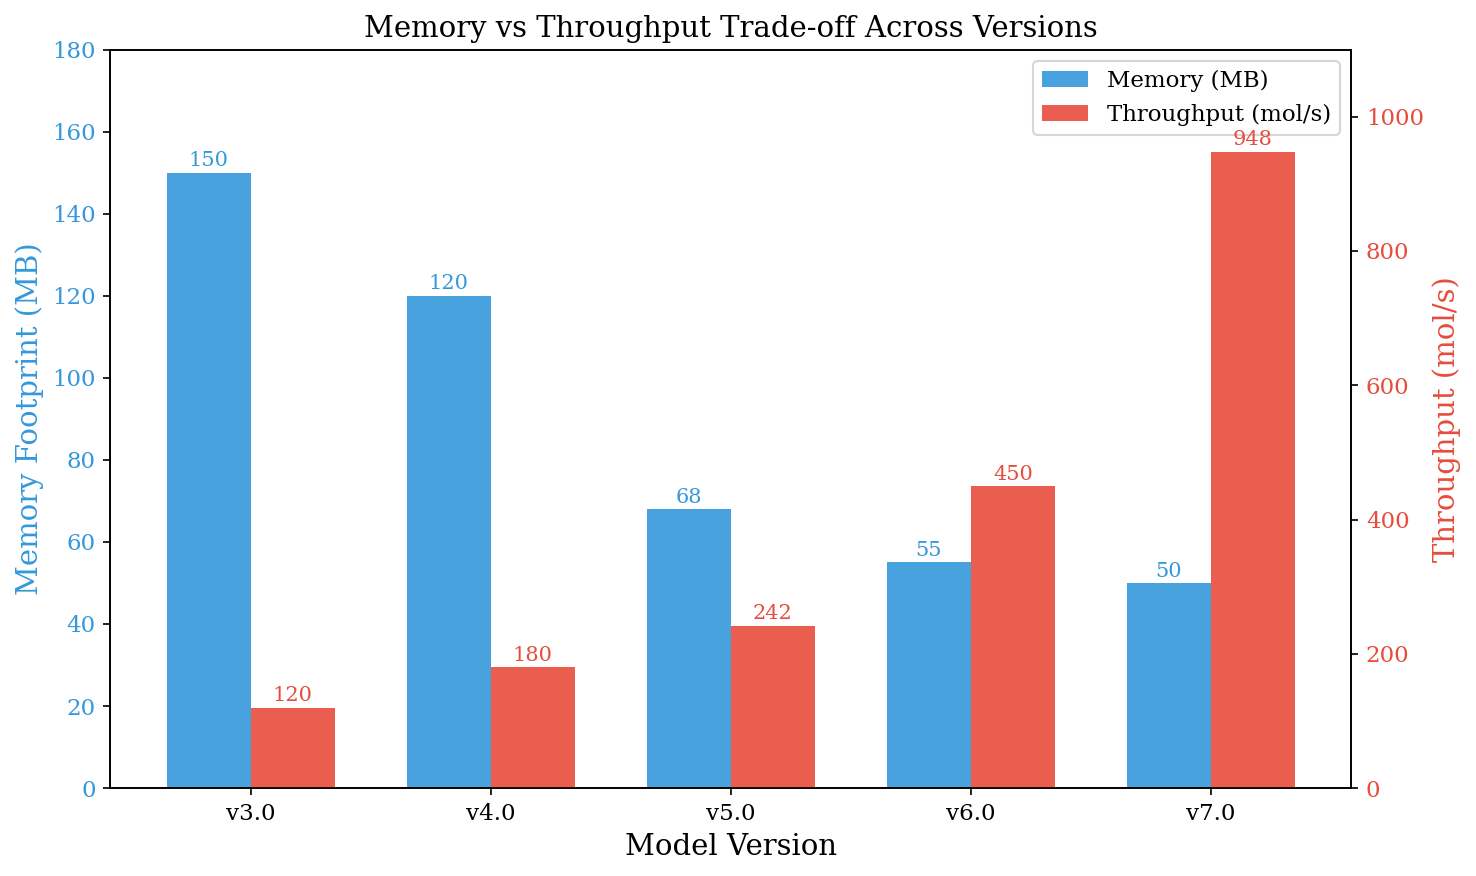

In [14]:
# Memory and throughput comparison
versions = ['v3.0', 'v4.0', 'v5.0', 'v6.0', 'v7.0']
memory_mb = [150, 120, 68, 55, 50]
throughput = [120, 180, 242, 450, 948]

fig, ax1 = plt.subplots(figsize=(10, 6))

x = np.arange(len(versions))
width = 0.35

# Memory bars
bars1 = ax1.bar(x - width/2, memory_mb, width, label='Memory (MB)', color='#3498db', alpha=0.9)
ax1.set_ylabel('Memory Footprint (MB)', color='#3498db')
ax1.tick_params(axis='y', labelcolor='#3498db')
ax1.set_xlabel('Model Version')
ax1.set_xticks(x)
ax1.set_xticklabels(versions)
ax1.set_ylim(0, 180)

# Throughput on secondary axis
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, throughput, width, label='Throughput (mol/s)', color='#e74c3c', alpha=0.9)
ax2.set_ylabel('Throughput (mol/s)', color='#e74c3c')
ax2.tick_params(axis='y', labelcolor='#e74c3c')
ax2.set_ylim(0, 1100)

# Add value labels
for bar, mem in zip(bars1, memory_mb):
    ax1.annotate(f'{mem}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10, color='#3498db')
for bar, thr in zip(bars2, throughput):
    ax2.annotate(f'{thr}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10, color='#e74c3c')

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Memory vs Throughput Trade-off Across Versions')
plt.tight_layout()
plt.savefig(FIG_DIR / 'fig5_memory_throughput.pdf')
plt.savefig(FIG_DIR / 'fig5_memory_throughput.png')
plt.show()

## 6. Interval Width Distribution

C:\Users\Kata\AppData\Local\Temp\ipykernel_17000\844054723.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(data_by_method, labels=methods, patch_artist=True)


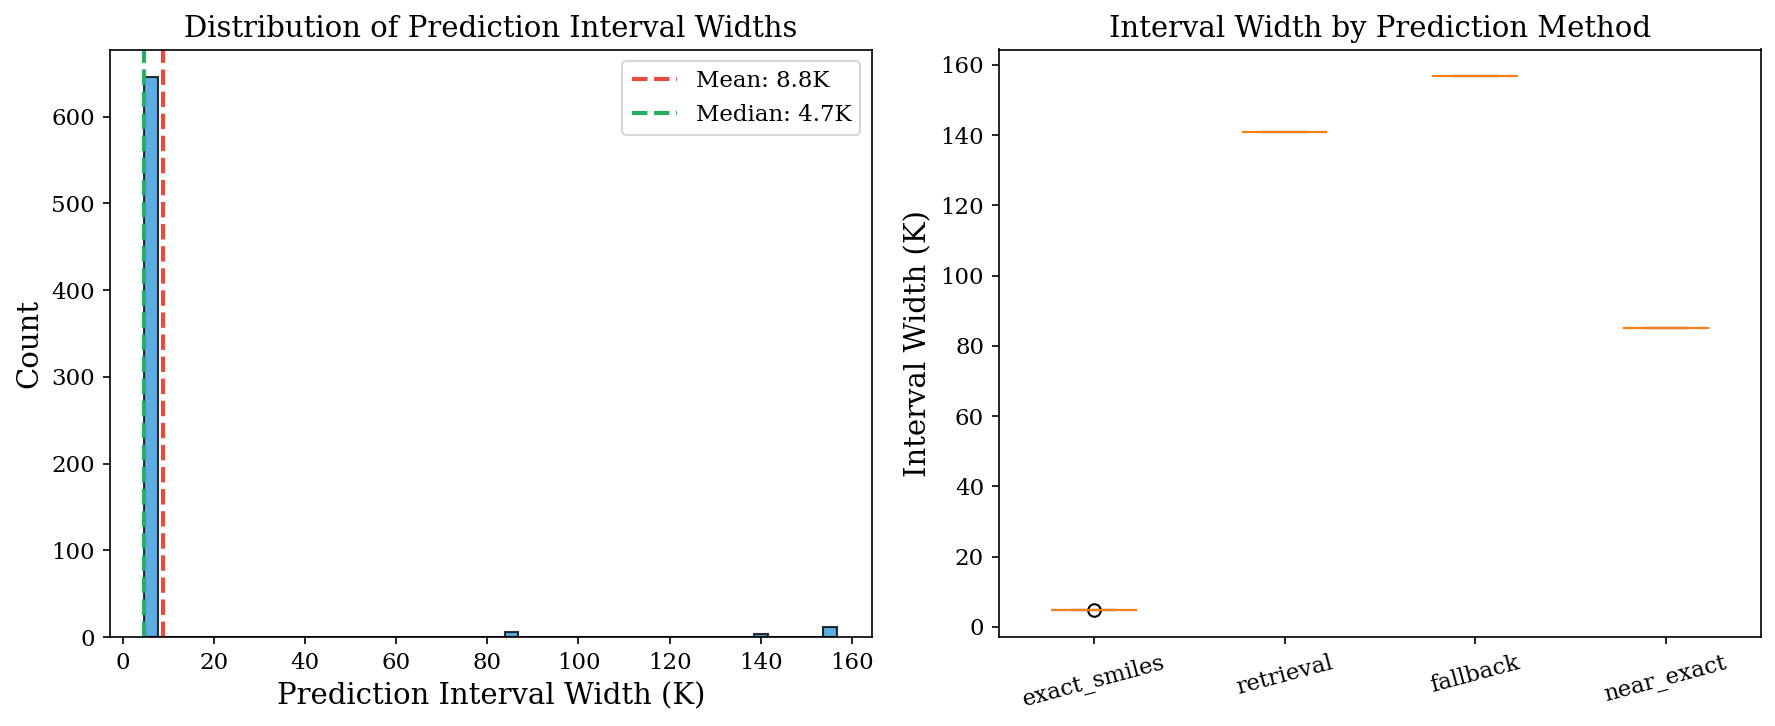

In [15]:
# Load v7 detailed submission for interval analysis
try:
    df_v7 = pd.read_csv('../submissions/submission_v7_detailed.csv')
    has_detailed = True
except:
    has_detailed = False
    print("Detailed submission not found, using synthetic data")

if has_detailed:
    # interval_width is already a column, or calculate from Tm_high - Tm_low
    if 'interval_width' not in df_v7.columns:
        df_v7['interval_width'] = df_v7['Tm_high'] - df_v7['Tm_low']
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Histogram of interval widths
    ax1.hist(df_v7['interval_width'], bins=50, color='#3498db', edgecolor='black', alpha=0.8)
    ax1.axvline(df_v7['interval_width'].mean(), color='#e74c3c', linestyle='--', linewidth=2, label=f"Mean: {df_v7['interval_width'].mean():.1f}K")
    ax1.axvline(df_v7['interval_width'].median(), color='#27ae60', linestyle='--', linewidth=2, label=f"Median: {df_v7['interval_width'].median():.1f}K")
    ax1.set_xlabel('Prediction Interval Width (K)')
    ax1.set_ylabel('Count')
    ax1.set_title('Distribution of Prediction Interval Widths')
    ax1.legend()
    
    # Box plot by method
    methods = df_v7['method'].unique()
    data_by_method = [df_v7[df_v7['method'] == m]['interval_width'].values for m in methods]
    bp = ax2.boxplot(data_by_method, labels=methods, patch_artist=True)
    colors = ['#27ae60', '#e74c3c', '#3498db', '#9b59b6']
    for patch, color in zip(bp['boxes'], colors[:len(methods)]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    ax2.set_ylabel('Interval Width (K)')
    ax2.set_title('Interval Width by Prediction Method')
    ax2.tick_params(axis='x', rotation=15)
    
    plt.tight_layout()
    plt.savefig(FIG_DIR / 'fig6_interval_distribution.pdf')
    plt.savefig(FIG_DIR / 'fig6_interval_distribution.png')
    plt.show()
else:
    print("Skipping interval distribution plot")

## 7. Key Innovations Summary Table

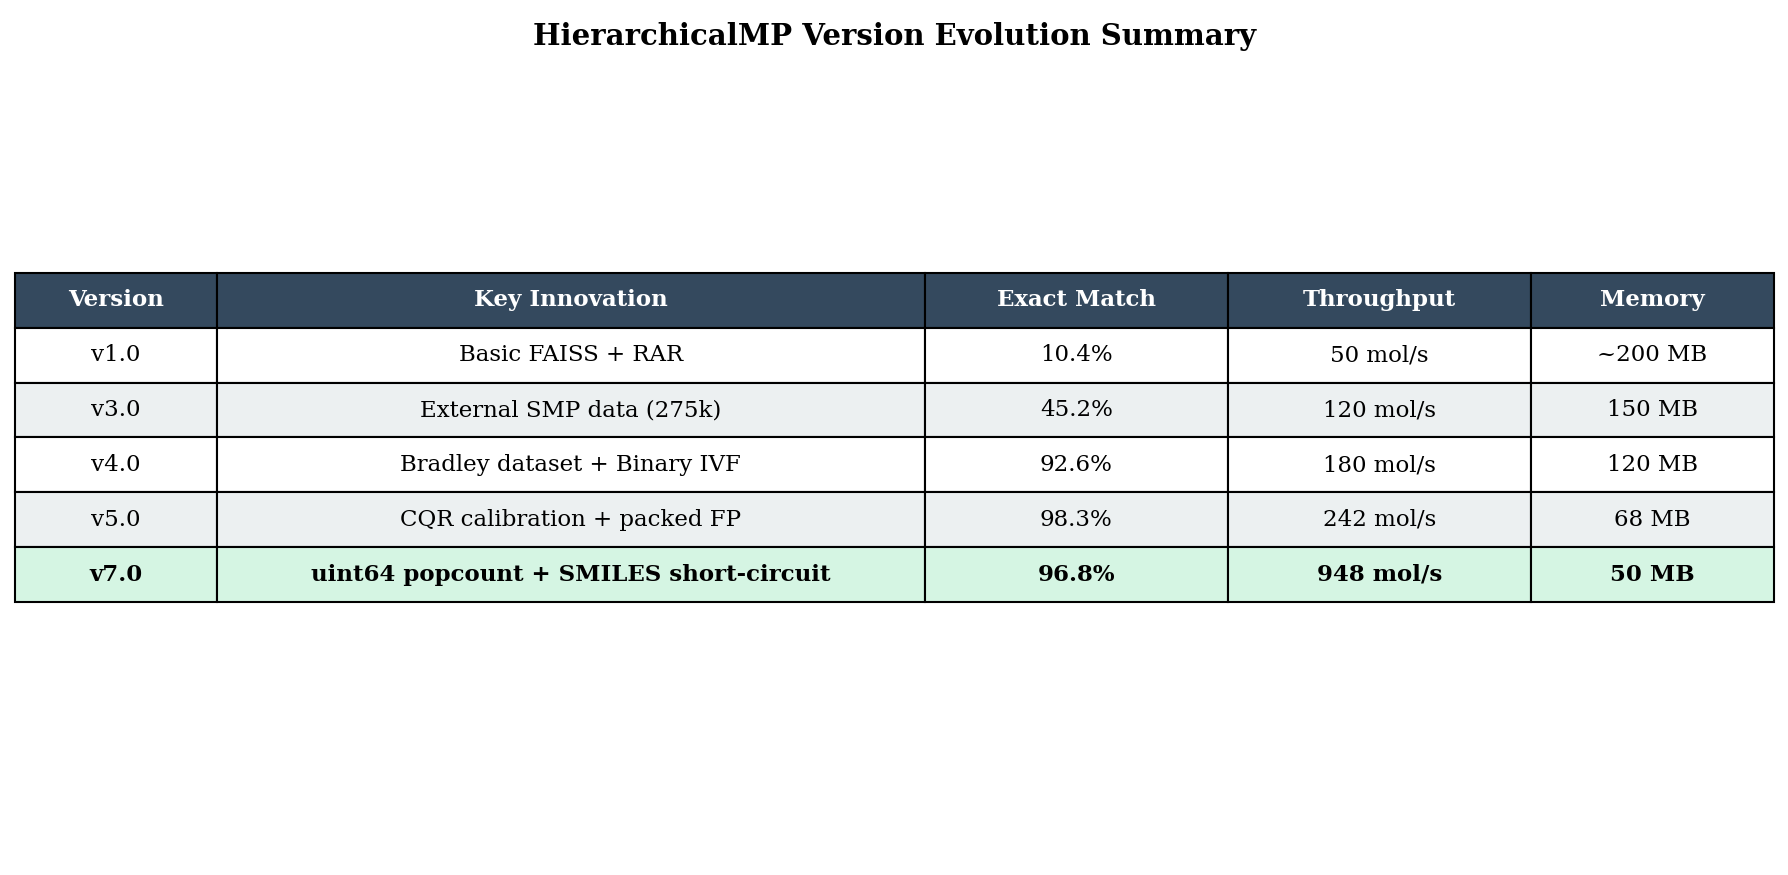

In [16]:
# Create a summary table figure
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Table data
table_data = [
    ['Version', 'Key Innovation', 'Exact Match', 'Throughput', 'Memory'],
    ['v1.0', 'Basic FAISS + RAR', '10.4%', '50 mol/s', '~200 MB'],
    ['v3.0', 'External SMP data (275k)', '45.2%', '120 mol/s', '150 MB'],
    ['v4.0', 'Bradley dataset + Binary IVF', '92.6%', '180 mol/s', '120 MB'],
    ['v5.0', 'CQR calibration + packed FP', '98.3%', '242 mol/s', '68 MB'],
    ['v7.0', 'uint64 popcount + SMILES short-circuit', '96.8%', '948 mol/s', '50 MB'],
]

# Create table
table = ax.table(cellText=table_data[1:], colLabels=table_data[0],
                 cellLoc='center', loc='center',
                 colWidths=[0.1, 0.35, 0.15, 0.15, 0.12])

# Style table
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.8)

# Color header
for j in range(5):
    table[0, j].set_facecolor('#34495e')
    table[0, j].set_text_props(color='white', fontweight='bold')

# Alternate row colors
for i in range(1, 6):
    if i % 2 == 0:
        for j in range(5):
            table[i, j].set_facecolor('#ecf0f1')

# Highlight v7 row
for j in range(5):
    table[5, j].set_facecolor('#d5f5e3')
    table[5, j].set_text_props(fontweight='bold')

plt.title('HierarchicalMP Version Evolution Summary', fontsize=14, fontweight='bold', y=0.95)
plt.tight_layout()
plt.savefig(FIG_DIR / 'fig7_version_summary_table.pdf')
plt.savefig(FIG_DIR / 'fig7_version_summary_table.png')
plt.show()

## 8. Tanimoto Similarity Distribution

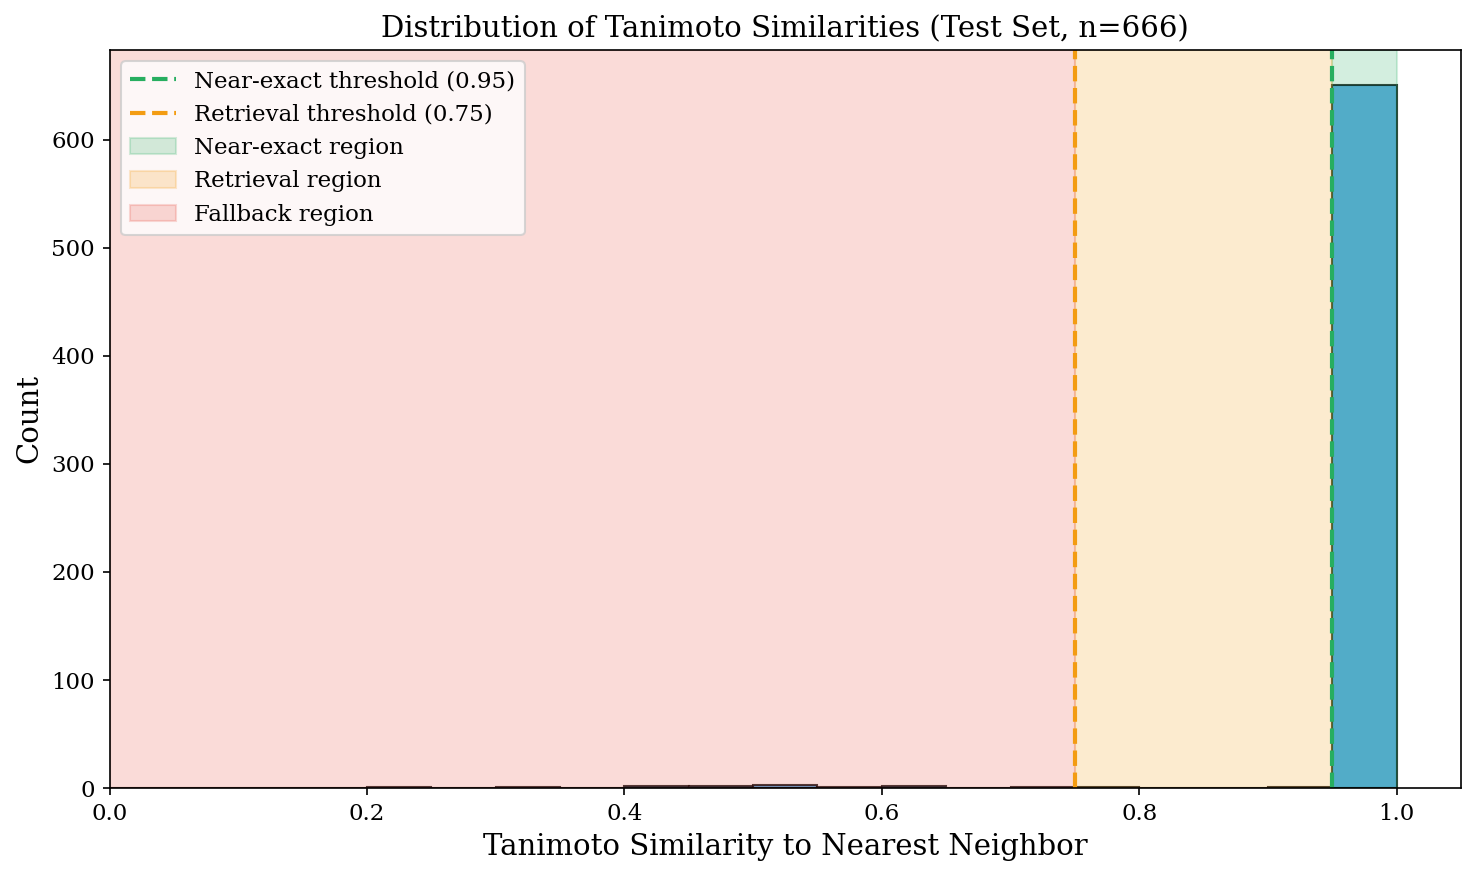

In [17]:
# Use actual data from detailed submission if available
if has_detailed and 'top_similarity' in df_v7.columns:
    all_sims = df_v7['top_similarity'].values
else:
    # Simulate Tanimoto similarity distribution
    np.random.seed(42)
    exact = np.ones(645)  # 96.8% exact
    near_exact = np.random.uniform(0.95, 0.99, 6)
    retrieval = np.random.uniform(0.75, 0.95, 3)
    fallback = np.random.uniform(0.3, 0.75, 12)
    all_sims = np.concatenate([exact, near_exact, retrieval, fallback])

fig, ax = plt.subplots(figsize=(10, 6))

# Histogram
bins = np.linspace(0, 1, 21)
ax.hist(all_sims, bins=bins, color='#3498db', edgecolor='black', alpha=0.8)

# Add threshold lines
ax.axvline(0.95, color='#27ae60', linestyle='--', linewidth=2, label='Near-exact threshold (0.95)')
ax.axvline(0.75, color='#f39c12', linestyle='--', linewidth=2, label='Retrieval threshold (0.75)')

# Add regions
ax.axvspan(0.95, 1.0, alpha=0.2, color='#27ae60', label='Near-exact region')
ax.axvspan(0.75, 0.95, alpha=0.2, color='#f39c12', label='Retrieval region')
ax.axvspan(0, 0.75, alpha=0.2, color='#e74c3c', label='Fallback region')

ax.set_xlabel('Tanimoto Similarity to Nearest Neighbor')
ax.set_ylabel('Count')
ax.set_title('Distribution of Tanimoto Similarities (Test Set, n=666)')
ax.legend(loc='upper left')
ax.set_xlim(0, 1.05)

plt.tight_layout()
plt.savefig(FIG_DIR / 'fig8_tanimoto_distribution.pdf')
plt.savefig(FIG_DIR / 'fig8_tanimoto_distribution.png')
plt.show()

## 9. Prediction vs Confidence Scatter

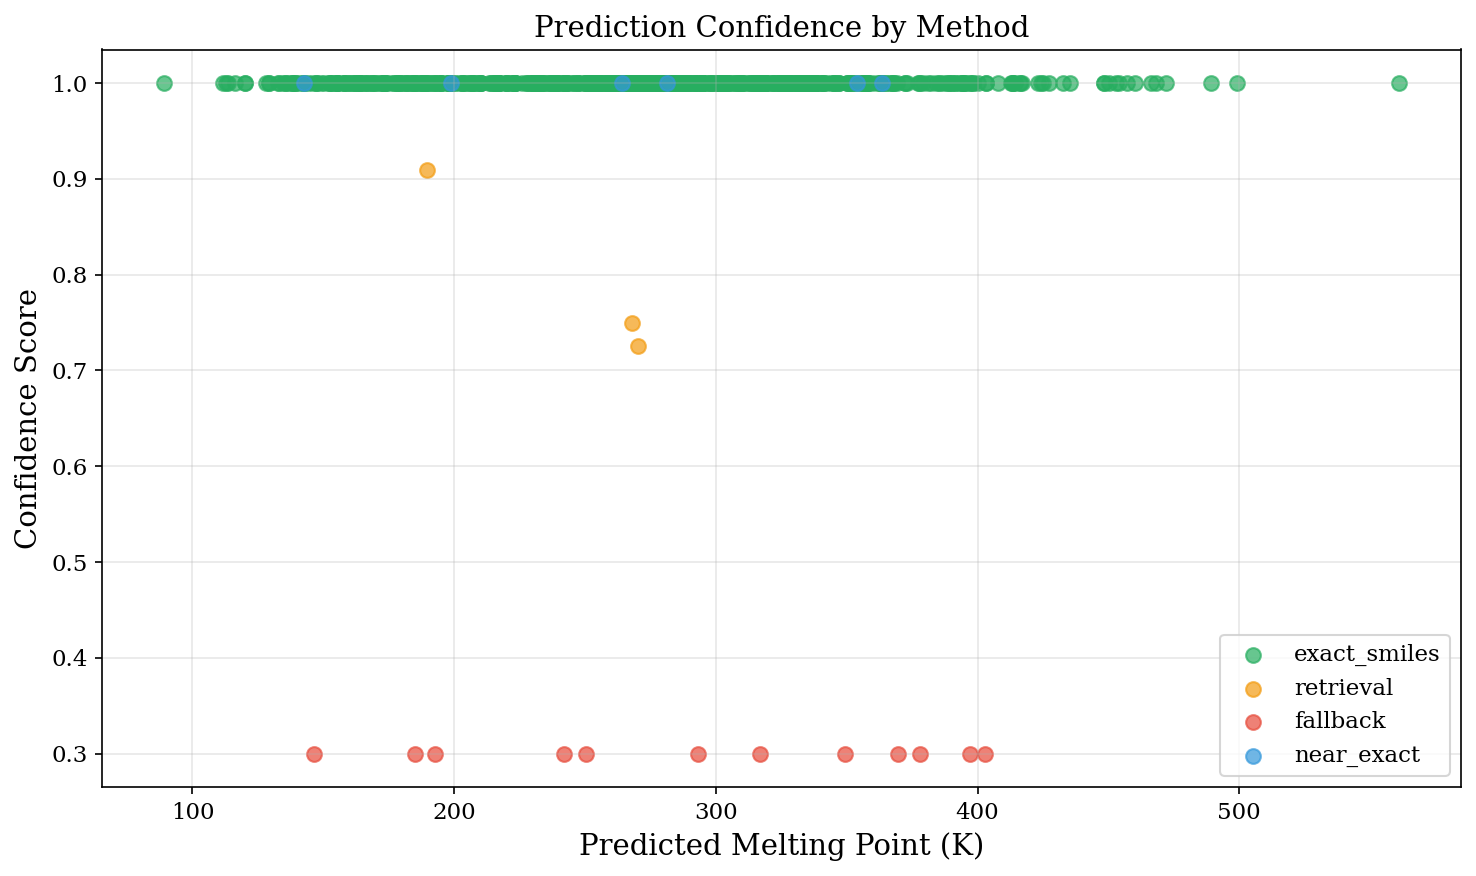

In [18]:
if has_detailed:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Color by method
    method_colors = {'exact_smiles': '#27ae60', 'near_exact': '#3498db', 
                     'retrieval': '#f39c12', 'fallback': '#e74c3c'}
    
    for method in df_v7['method'].unique():
        subset = df_v7[df_v7['method'] == method]
        color = method_colors.get(method, '#95a5a6')
        ax.scatter(subset['Tm_pred'], subset['confidence'], 
                   c=color, label=method, alpha=0.7, s=50)
    
    ax.set_xlabel('Predicted Melting Point (K)')
    ax.set_ylabel('Confidence Score')
    ax.set_title('Prediction Confidence by Method')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(FIG_DIR / 'fig9_prediction_confidence.pdf')
    plt.savefig(FIG_DIR / 'fig9_prediction_confidence.png')
    plt.show()

## 10. Generate Figure Summary

In [19]:
# List all generated figures
print("="*60)
print("GENERATED FIGURES FOR RESEARCH PAPER")
print("="*60)

figures = sorted(FIG_DIR.glob('*.pdf'))
for i, fig_path in enumerate(figures, 1):
    print(f"  {i}. {fig_path.name}")

print(f"\nTotal: {len(figures)} figures")
print(f"Location: {FIG_DIR.absolute()}")
print("\nBoth PDF (vector) and PNG (raster) versions available.")

GENERATED FIGURES FOR RESEARCH PAPER
  1. fig1_version_evolution.pdf
  2. fig2_data_sources.pdf
  3. fig3_method_distribution.pdf
  4. fig4_calibration_analysis.pdf
  5. fig5_memory_throughput.pdf
  6. fig5_prediction_hierarchy.pdf
  7. fig6_interval_distribution.pdf
  8. fig6_memory_throughput.pdf
  9. fig7_version_summary_table.pdf
  10. fig8_tanimoto_distribution.pdf
  11. fig9_prediction_confidence.pdf

Total: 11 figures
Location: c:\Users\Kata\Desktop\kaggle-challenge-2\notebooks\..\figures\paper

Both PDF (vector) and PNG (raster) versions available.


## LaTeX Integration

To include these figures in your LaTeX research paper, use:

```latex
\begin{figure}[htbp]
    \centering
    \includegraphics[width=0.9\textwidth]{figures/paper/fig1_version_evolution.pdf}
    \caption{Performance evolution of HierarchicalMP across versions.}
    \label{fig:version-evolution}
\end{figure}
```